In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from ima.ima.plotting import cart2pol
from gp_ima.ima import C_ima_digamma, C_ima_sample
import GPy
from tueplots import bundles, figsizes

In [ ]:
import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [ ]:
from analysis import plot_typography, estimate2uniform, generate_moebius_data

In [ ]:
USETEX = True

In [ ]:
plt.rcParams.update(bundles.neurips2022(usetex=USETEX))
plt.rcParams.update({
    'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
                            r'\usepackage{amsmath}'] # boldsymbol
})

In [ ]:
plot_typography(usetex=USETEX, small=12, medium=16, big=20)

In [ ]:

plt.ion(); plt.style.use('hsv')


In [ ]:
NUM_DATA = 500
LATENT_DIM = OBS_DIM = 2
SEED = 42

np.random.seed(SEED)
Z, X, c = generate_moebius_data(NUM_DATA, LATENT_DIM, OBS_DIM)

In [ ]:
plt.scatter(Z[:, 0], Z[:, 1], c=c)


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=c)

In [ ]:
NUM_SEEDS = 10
NUM_SAMPLES_C_IMA = 100
NUM_RESTARTS = 3

cimas_sparse = []
zs_sparse  =[]
zs_uni_sparse =[]

np.random.seed(SEED)

for i in range(NUM_SEEDS):
    kernel = GPy.kern.RBF(2, ARD=False) + GPy.kern.Bias(2)
    m = GPy.models.BayesianGPLVM(np.asarray(X), 2, kernel=kernel, num_inducing=20)
    m.optimize_restarts(NUM_RESTARTS, optimizer='lbfgs')

    cimas_sparse.append(np.mean([C_ima_sample(m) for _ in range(NUM_SAMPLES_C_IMA)]))
    zs_sparse.append(m.X.mean)
    zs_uni_sparse.append(estimate2uniform(zs_sparse[-1]))


In [ ]:
idx = 2

_, cest = cart2pol(zs_sparse[idx][:, 0], zs_sparse[idx][:, 1])
plt.scatter(zs_sparse[idx][:, 0], zs_sparse[idx][:, 1], c=cest)

In [ ]:


_, cest = cart2pol(zs_uni_sparse[idx][:, 0], zs_uni_sparse[idx][:, 1])
plt.scatter(zs_uni_sparse[idx][:, 0], zs_uni_sparse[idx][:, 1], c=c)

In [ ]:
Ds = np.logspace(0, 3, 1000).astype(int)
plt.plot(Ds, [C_ima_digamma(max(1, int(np.log(D))), D) for D in Ds])

In [ ]:
NUM_SEEDS = 5
NUM_SAMPLES_C_IMA = 100
NUM_RESTARTS = 5

cimas = []
zs  =[]
zs_uni =[]

np.random.seed(SEED)

for i in range(NUM_SEEDS):
    kernel = GPy.kern.RBF(2, ARD=False) + GPy.kern.Bias(2)
    m = GPy.models.GPLVM(np.asarray(X), 2, kernel=kernel)
    m.likelihood = GPy.likelihoods.Gaussian(variance=1e-6)
    m.optimize_restarts(NUM_RESTARTS, optimizer='lbfgs')

    cimas.append(np.mean([C_ima_sample(m) for _ in range(NUM_SAMPLES_C_IMA)]))
    zs.append(m.X.values)
    zs_uni.append(estimate2uniform(zs[-1]))

In [ ]:
idx = 0
plt.scatter(zs[idx][:, 0], zs[idx][:, 1], c=c)

In [ ]:
cimas

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

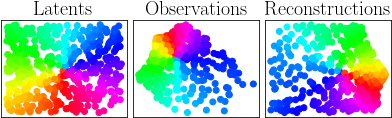

In [65]:
LABELPAD = 1
TICK_PADDING = 2
IDX = 4
fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=2, rel_width=1)['figure.figsize'])




ax = fig.add_subplot(131)
ax.scatter(Z[:, 0], Z[:, 1], c=c, cmap="hsv", label="Latents")

ax2 = fig.add_subplot(132)
ax2.scatter(X[:, 0], X[:, 1], c=c, cmap="hsv", label="Observations")

ax3 = fig.add_subplot(133)
ax3.scatter(zs_uni[IDX][:, 0], zs_uni[IDX][:, 1], c=c, cmap="hsv", label="Reconstruction")

# Remove ticks and labels and set which side to label
ticksoff = dict(labelleft=False, labelright=False, left=False, right=False, labelbottom=False, bottom=False)
ax.tick_params(axis="both", **ticksoff)
ax2.tick_params(axis="both", **ticksoff)
ax3.tick_params(axis="both", **ticksoff)

ax.set_title("Latents")
ax2.set_title("Observations")
ax3.set_title("Reconstructions")



plt.savefig("gplvm_ima.svg")